<a href="https://colab.research.google.com/github/Subash65/Titanic_Survival_Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# importing the dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
#loading the dataset
titanic_data = pd.read_csv('/content/train.csv')

In [7]:
# Display first five rows
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Display the columns of the dataset
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# number of rows and Columns
titanic_data.shape

(891, 12)

In [10]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# getting statistical measure of the dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# check the number of missing values in each column
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handling missing values

In [121]:
titanic_data = titanic_data.drop(columns = 'Title')

In [120]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [13]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [15]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [16]:
print(titanic_data['Embarked'].mode()[0])

S


In [17]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [20]:
# check the number of missing values in each column
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Convert Categorical Data

In [124]:
#label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

In [123]:
# Encode 'Sex' column
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])


In [122]:
# Encode 'Embarked' column
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

Feature Engineering

In [125]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = np.where(titanic_data['FamilySize'] == 1, 1, 0)

Data Analysis

In [126]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [127]:
# getting statistical measure of the dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,0.367921,0.523008,0.381594,0.062858,0.361392,1.904602,0.602694
std,257.353842,0.486592,0.836071,0.477990,0.163383,1.102743,0.806057,0.096995,0.635673,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015440,0.000000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.367921,0.000000,0.000000,0.028213,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508,1.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000,2.000000,11.000000,1.000000


Data Visualization

In [128]:
sns.set()

<ipython-input-129-5e310e471758>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Survived', data = titanic_data, palette='Set2')


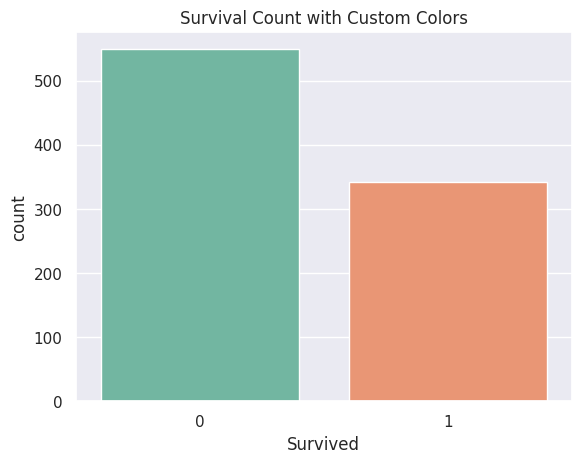

In [129]:
# making a count plot for "Survived" column
sns.countplot(x = 'Survived', data = titanic_data, palette='Set2')
plt.title('Survival Count with Custom Colors')
plt.show()

In [130]:
titanic_data['Sex'].value_counts()

,count
Sex,
0,577
1,314


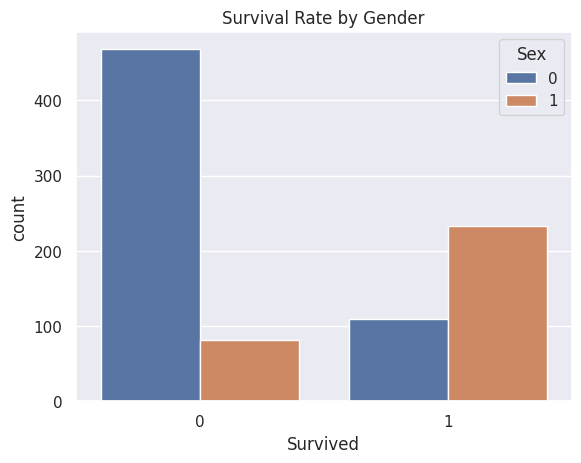

In [131]:
# Visualize survival by Sex
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.show()

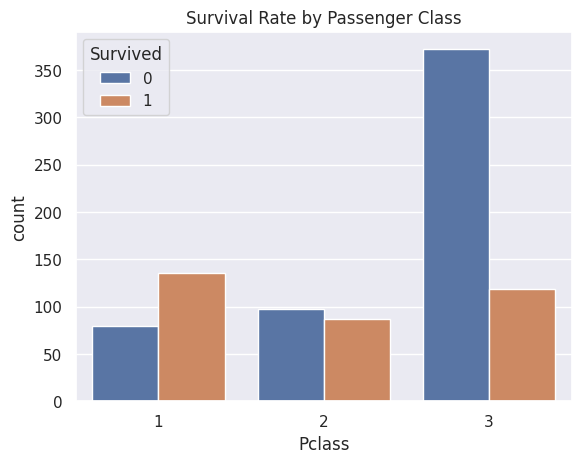

In [132]:
# Visualize survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

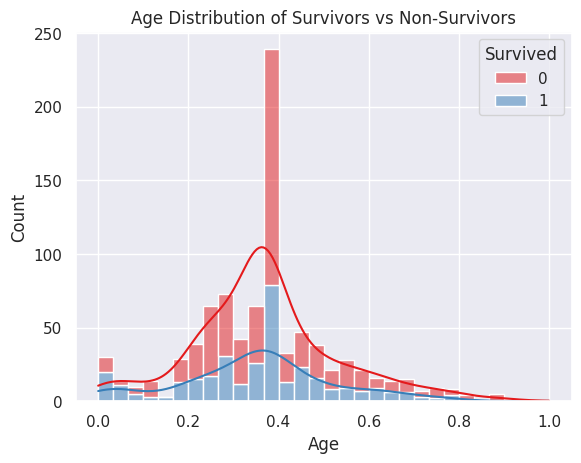

In [133]:
# Age distribution by survival status
sns.histplot(data=titanic_data, x='Age', hue='Survived', multiple='stack', palette='Set1', kde=True)
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.show()


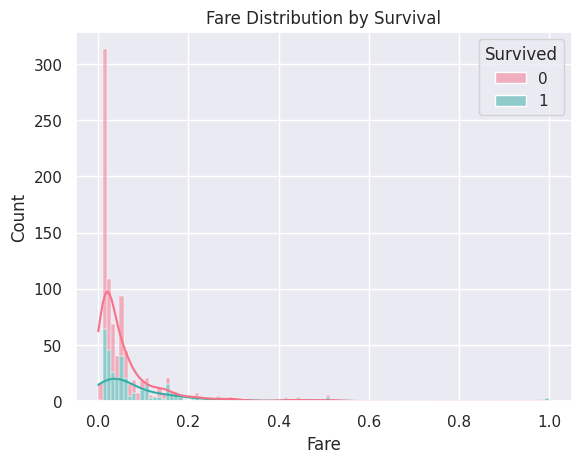

In [134]:
# Fare distribution by survival
sns.histplot(data=titanic_data, x='Fare', hue='Survived', multiple='stack', palette='husl', kde=True)
plt.title('Fare Distribution by Survival')
plt.show()


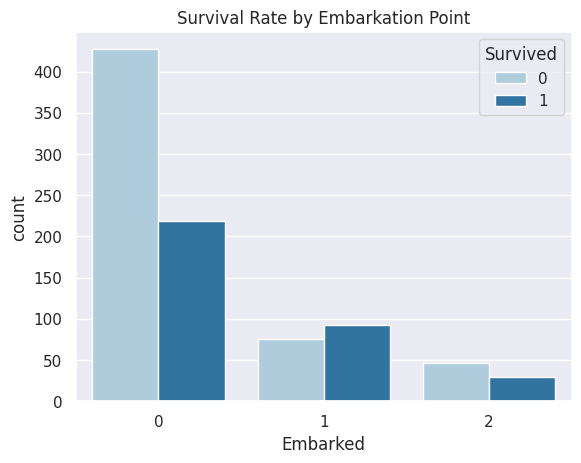

In [135]:
# Countplot for survival by embarkation point
sns.countplot(x='Embarked', hue='Survived', data=titanic_data, palette='Paired')
plt.title('Survival Rate by Embarkation Point')
plt.show()


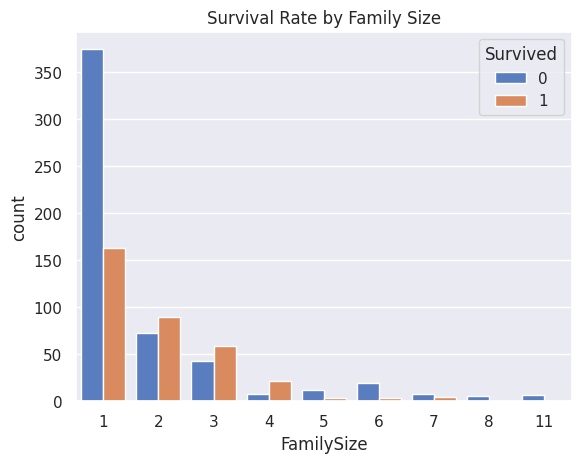

In [136]:
# Define family size
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# Family size vs survival countplot
sns.countplot(x='FamilySize', hue='Survived', data=titanic_data, palette='muted')
plt.title('Survival Rate by Family Size')
plt.show()


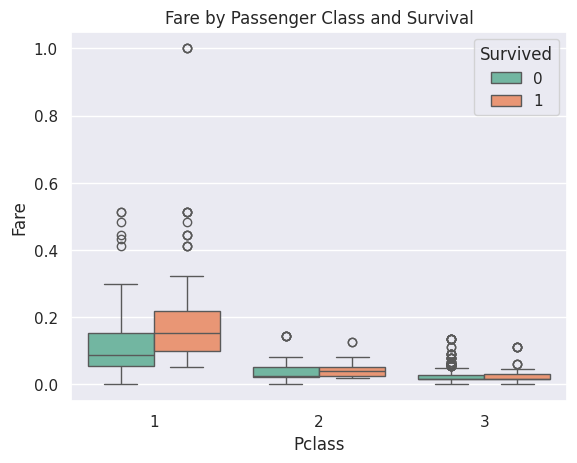

In [137]:
# Boxplot for Fare by Passenger Class and Survival
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=titanic_data, palette='Set2')
plt.title('Fare by Passenger Class and Survival')
plt.show()


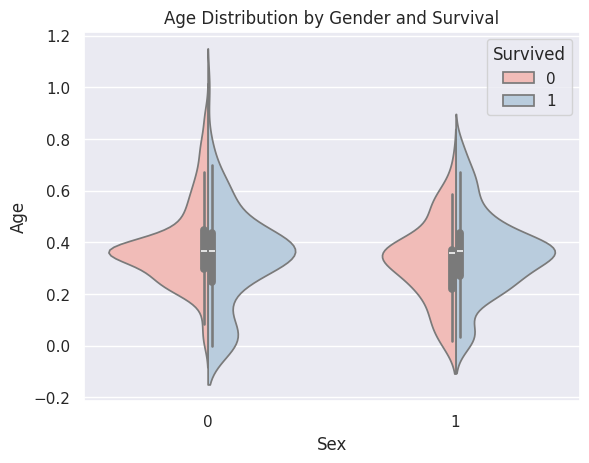

In [138]:
# Violin plot for Age by Gender and Survival
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_data, split=True, palette='Pastel1')
plt.title('Age Distribution by Gender and Survival')
plt.show()

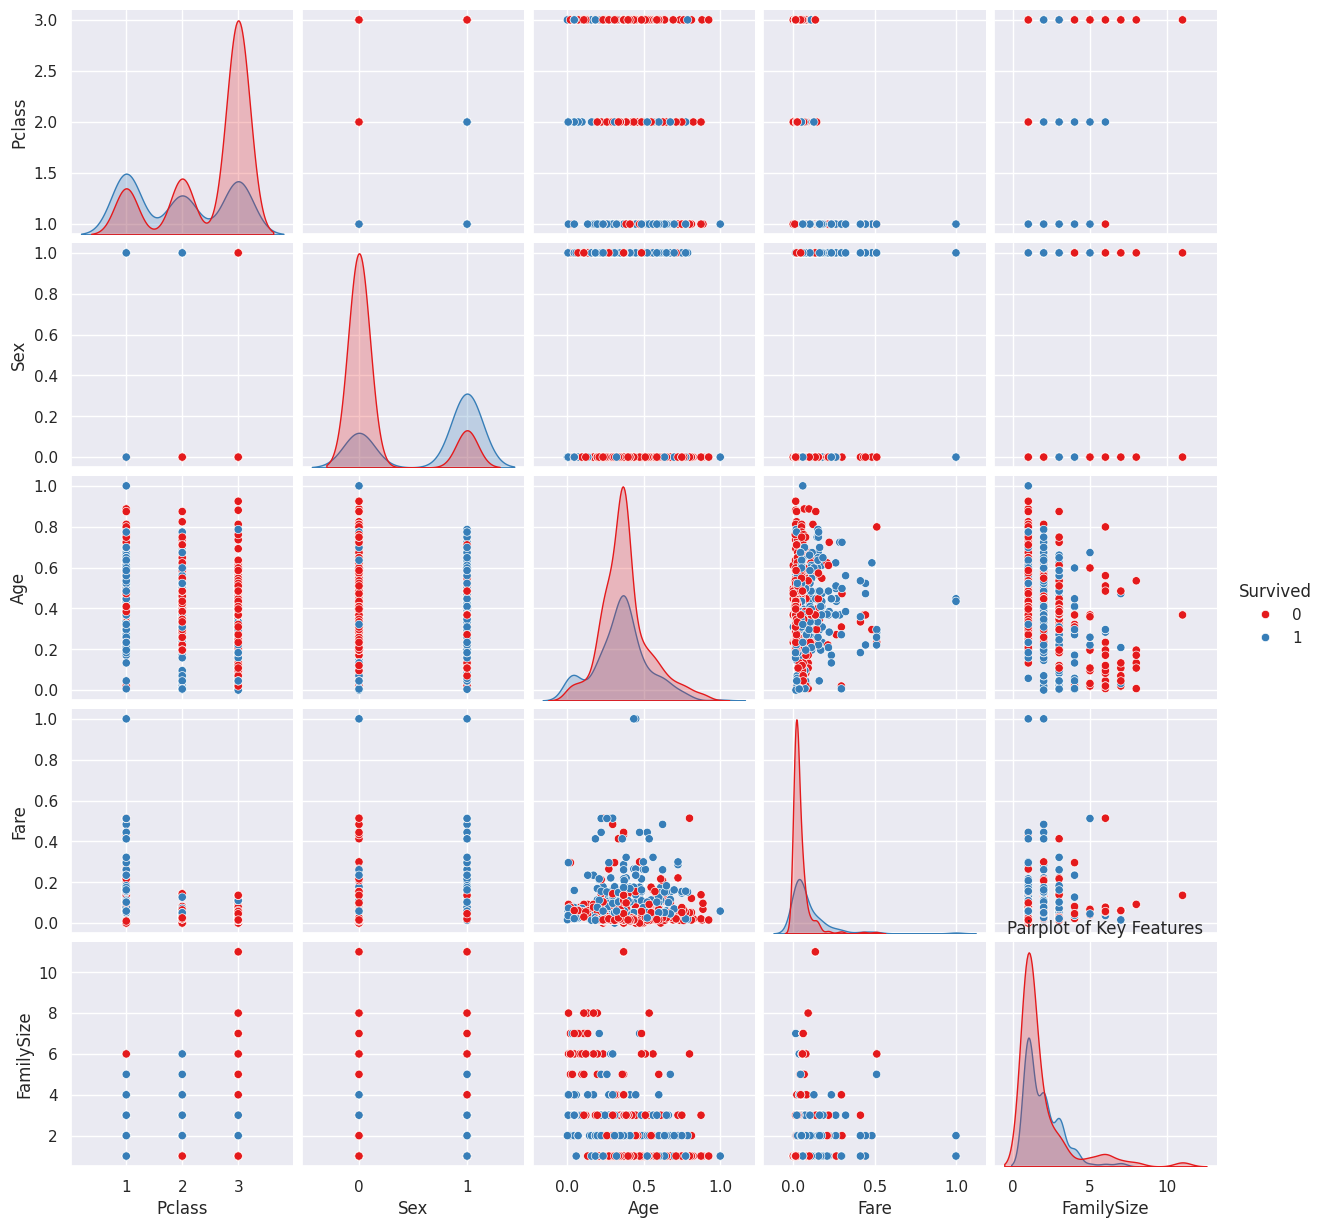

In [97]:
# Pairplot of key features
sns.pairplot(titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']], hue='Survived', palette='Set1')
plt.title('Pairplot of Key Features')
plt.show()


Encoding the Categorical Columns

In [139]:
titanic_data['Sex'].value_counts()

,count
Sex,
0,577
1,314


In [140]:
titanic_data['Embarked'].value_counts()

,count
Embarked,
0,646
1,168
2,77


In [141]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [101]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,0.271174,1,0,A/5 21171,0.014151,7,0,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.472229,1,0,PC 17599,0.139136,2,1,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,0.321438,0,0,STON/O2. 3101282,0.015469,7,0,1,1,6
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.434531,1,0,113803,0.103644,2,0,2,0,1
4,5,0,3,"Allen, Mr. William Henry",0,0.434531,0,0,373450,0.015713,7,0,1,1,0


In [142]:
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    0  0.271174      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.472229      1   
2                             Heikkinen, Miss. Laina    1  0.321438      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.434531      1   
4                           Allen, Mr. William Henry    0  0.434531      0   

   Parch            Ticket      Fare  Embarked  FamilySize  IsAlone  
0      0         A/5 21171  0.014151         0           2        0  
1      0          PC 17599  0.139136         1           2        0  
2      0  STON/O2. 3101282  0.015469         0           1        1  
3      0            113803  0.1036

feature scaling

In [148]:
# Initialize the scale
scaler = StandardScaler()

In [149]:
# Scale features
scaled_features = scaler.fit_transform(titanic_data[['Age', 'Fare', 'FamilySize']])

In [147]:

# Add scaled features to DataFrame
titanic_data[['Age', 'Fare', 'FamilySize']] = scaled_features

Normalization

In [108]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
# Initialize the scaler
scaler = MinMaxScaler()

In [150]:
# Normalize features
normalized_features = scaler.fit_transform(titanic_data[['Age', 'Fare', 'FamilySize']])

In [151]:
# Add normalized features to DataFrame
titanic_data[['Age', 'Fare', 'FamilySize']] = normalized_features

Separating features & Target

In [152]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [153]:
print(X)

     Pclass  Sex           Age  SibSp  Parch      Fare  Embarked  FamilySize  \
0         3    0 -5.924806e-01      1      0 -0.502445         0    0.059160   
1         1    1  6.387890e-01      1      0  0.786845         1    0.059160   
2         3    1 -2.846632e-01      0      0 -0.488854         0   -0.560975   
3         1    1  4.079260e-01      1      0  0.420730         0    0.059160   
4         3    0  4.079260e-01      0      0 -0.486337         0   -0.560975   
..      ...  ...           ...    ...    ...       ...       ...         ...   
886       2    0 -2.077088e-01      0      0 -0.386671         0   -0.560975   
887       1    1 -8.233437e-01      0      0 -0.044381         0   -0.560975   
888       3    1 -2.073413e-16      1      2 -0.176263         0    1.299429   
889       1    0 -2.846632e-01      0      0 -0.044381         1   -0.560975   
890       3    0  1.770629e-01      0      0 -0.492378         2   -0.560975   

     IsAlone  
0          0  
1        

In [154]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting the data into training data & Test data

In [155]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [156]:
print(X.shape, X_train.shape, X_test.shape)

(891, 9) (712, 9) (179, 9)


Model training

In [157]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier()
}

In [164]:
# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, Y_train)

    # Predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Accuracy scores
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Print results
    print(f"{name} Accuracy:")
    print(f"  Training Accuracy: {train_accuracy:.4f}")
    print(f"  Testing Accuracy: {test_accuracy:.4f}")
    print(f"Confusion Matrix for {name} on Test Data:\n{confusion_matrix(Y_test, Y_test_pred)}")
    print(f"Classification Report for {name} on Test Data:\n{classification_report(Y_test, Y_test_pred)}")
    print("\n")

Random Forest Accuracy:
  Training Accuracy: 0.9860
  Testing Accuracy: 0.8045
Confusion Matrix for Random Forest on Test Data:
[[85 15]
 [20 59]]
Classification Report for Random Forest on Test Data:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       100
           1       0.80      0.75      0.77        79

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



SVM Accuracy:
  Training Accuracy: 0.8399
  Testing Accuracy: 0.7933
Confusion Matrix for SVM on Test Data:
[[90 10]
 [27 52]]
Classification Report for SVM on Test Data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       100
           1       0.84      0.66      0.74        79

    accuracy                           0.79       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80    